# Importing Libraries and Merged Dataset

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
#import geopandas as gpd
#import contextily as cx
from sklearn.preprocessing import scale #
from sklearn import decomposition #PCA
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

indicators_ltss_counties = pd.read_csv('us_counties_and_ltss.csv')
#geo_counties = gpd.read_file('acs2023_5yr_B17020_05000US17113.geojson')

# Preview Merged Data Info

In [ ]:
# clean small errors in data- remove empty col and set fips to string
indicators_ltss_counties = indicators_ltss_counties.drop(columns='Unnamed: 0')
indicators_ltss_counties['fips']= indicators_ltss_counties['fips'].astype(str)
indicators_ltss_counties.set_index('fips')

### Creating relevant calculated fields

In [49]:
indicators_ltss_counties['per_capita_ltss'] = indicators_ltss_counties['state_ltss_expense'] / indicators_ltss_counties['state_insitutional_enrollment']
indicators_ltss_counties['per_capta_institutional'] = indicators_ltss_counties['state_insitutional_expense'] / indicators_ltss_counties['state_insitutional_enrollment']
indicators_ltss_counties['per_capita_hcbs'] = indicators_ltss_counties['state_hcbs_expense'] / indicators_ltss_counties['state_hcbs_enrollment']

In [57]:
subset_cols = ['fips', 'per_capita_ltss','per_capta_institutional', 'per_capita_hcbs', 'school_segration_index','gender_pay_gap', 'water_quality', 'air_quality', 'uninsured', 'adverse_climate', 'school_funding_gap', 'residential_segregation', 'rural_population','hs_diploma', 'unemployed', 'median_income',  'premature_death', 'income_inequality', 'child_poverty', 'life_expectancy', 'child_mortality', 'infant_mortality','disability_adults']
ltss_counties_subset  = indicators_ltss_counties[subset_cols]

In [58]:
ltss_counties_subset.describe()

,per_capita_ltss,per_capta_institutional,per_capita_hcbs,school_segration_index,gender_pay_gap,water_quality,air_quality,uninsured,adverse_climate,school_funding_gap,...,hs_diploma,unemployed,median_income,premature_death,income_inequality,child_poverty,life_expectancy,child_mortality,infant_mortality,disability_adults
count,3143.000000,3143.000000,3143.000000,2918.000000,3122.000000,3080.000000,3064.000000,3130.000000,3139.000000,3052.000000,...,3131.000000,3138.000000,3130.000000,3086.000000,3110.000000,3130.000000,3066.000000,2047.000000,1178.000000,3131.000000
mean,135583.978645,49233.741036,18772.093301,0.082072,0.786556,0.369481,7.649119,0.104807,1.221090,-470.978543,...,0.887546,0.035843,65489.399042,10380.437877,4.558845,0.190020,75.152972,64.606419,6.530714,0.325495
std,67586.531836,15388.407771,8793.297563,0.075220,0.102079,0.482743,2.007685,0.046501,1.025575,6814.750271,...,0.054799,0.012013,16485.071600,3785.973073,0.810851,0.080455,3.607714,25.816776,2.064896,0.056646
min,52665.585916,23920.569465,3327.925563,0.000368,0.378798,0.000000,1.300000,0.021493,0.000000,-46776.990000,...,0.468085,0.003123,28579.000000,3315.252949,2.271341,0.031000,53.980813,19.014796,1.566580,0.179000
25%,97655.523681,39731.192143,9512.261452,0.033072,0.731129,0.000000,6.500000,0.069360,0.000000,-3054.648750,...,0.856432,0.027996,54610.750000,7733.414172,4.020858,0.131000,72.784990,47.066086,5.095984,0.283000
50%,116077.731542,49054.004099,19067.258608,0.058939,0.787331,0.000000,7.600000,0.094191,1.000000,20.215000,...,0.899071,0.034041,62771.000000,9824.238333,4.416846,0.179000,75.273062,59.831384,6.191143,0.320000
75%,147064.348890,55438.787568,25975.155259,0.106011,0.836486,1.000000,8.500000,0.131728,2.000000,2606.033900,...,0.927479,0.041502,73022.000000,12367.906878,4.954732,0.233750,77.533642,75.560577,7.743347,0.365000
max,376161.233164,141486.973316,45298.731033,0.638154,1.868850,1.000000,39.100000,0.376812,3.000000,35429.370000,...,1.000000,0.172688,173655.000000,46417.851930,10.496679,0.632000,94.218993,326.690624,15.384615,0.541000


<Axes: >

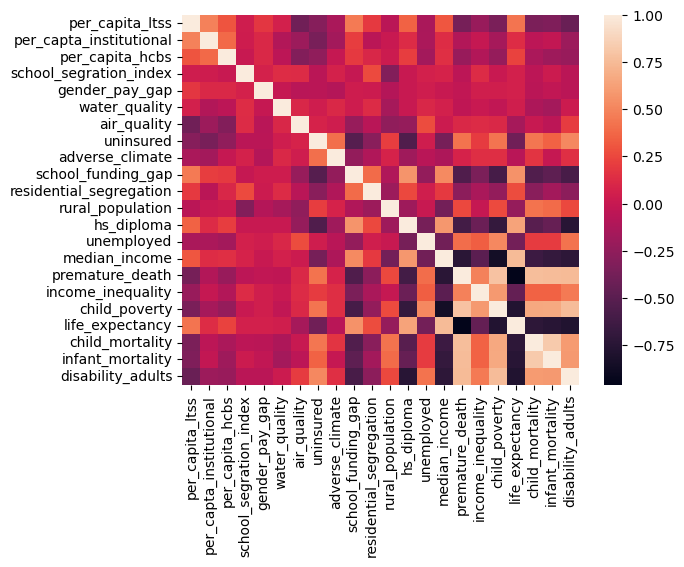

In [59]:
matrix_ltss = ltss_counties_subset.corr(method='spearman', numeric_only=True).round(2)
sns.heatmap(matrix_ltss)

In [61]:
ltss_counties_subset.columns

Index(['fips', 'per_capita_ltss', 'per_capta_institutional', 'per_capita_hcbs',
       'school_segration_index', 'gender_pay_gap', 'water_quality',
       'air_quality', 'uninsured', 'adverse_climate', 'school_funding_gap',
       'residential_segregation', 'rural_population', 'hs_diploma',
       'unemployed', 'median_income', 'premature_death', 'income_inequality',
       'child_poverty', 'life_expectancy', 'child_mortality',
       'infant_mortality', 'disability_adults'],
      dtype='object')

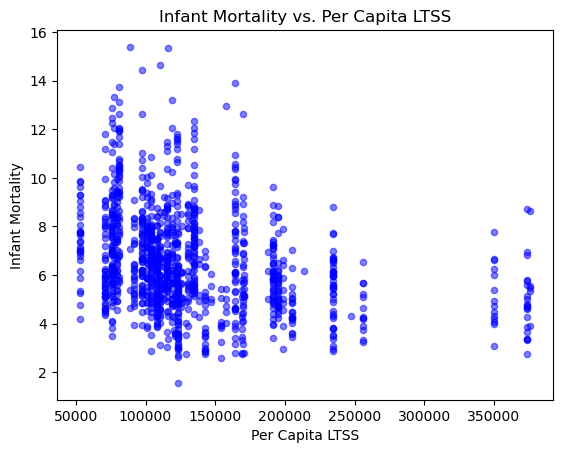

In [63]:
ltss_counties_subset.plot(kind='scatter', x='per_capita_ltss', y='infant_mortality', alpha=0.5, color='blue')
plt.title('Infant Mortality vs. Per Capita LTSS')
plt.xlabel('Per Capita LTSS')
plt.ylabel('Infant Mortality')
plt.savefig('infant_mortality_vs_per_capita_ltss.png')
plt.show()

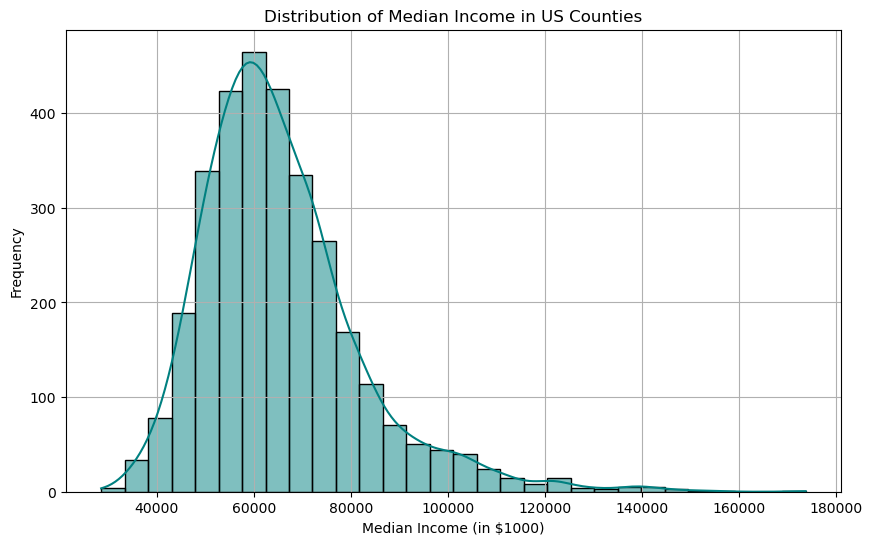

<Figure size 1000x600 with 0 Axes>

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(data=ltss_counties_subset, x='median_income', bins=30, kde=True, color='teal')
plt.title('Distribution of Median Income in US Counties')
plt.xlabel('Median Income (in $1000)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('median_income_distribution.png')
plt.show()
plt.figure(figsize=(10, 6))
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=ltss_counties_subset, x='per_capita_ltss', bins=30, kde=True, color='pink')
plt.title('Distribution of Per Capita LTSS in US Counties')
plt.xlabel('Per Capita LTSS')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('per_capita_ltss_distribution.png')
plt.show()

In [81]:
corr = ltss_counties_subset.corr(method='kendall')

In [82]:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

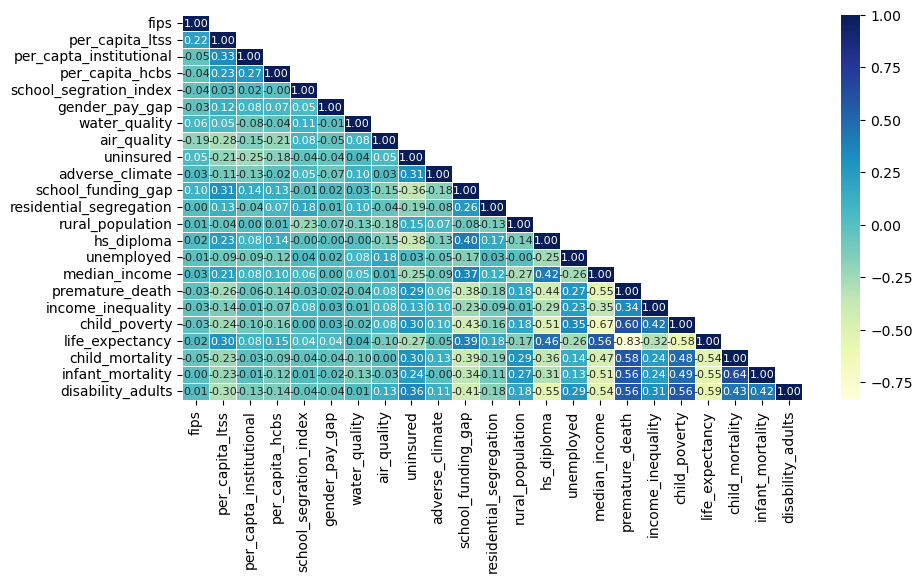

In [94]:
fig, ax = plt.subplots(figsize=(10,5))
# Generate the heatmap including the mask
heatmap = sns.heatmap(corr,
                      annot=True,
                      annot_kws={"fontsize": 8},
                      fmt=".2f",
                      linewidths=0.6,
                      cmap="YlGnBu",
                      mask=mask, # the mask has been included here
                      ax=ax)

# Display our plot
plt.show()

In [ ]:
subset_cols2 = ['gender_pay_gap','per_capita_hcbs', 'school_funding_gap', 'premature_death', 'income_inequality', 'child_poverty', 'hs_diploma']
subset_2 = ltss_counties_subset[subset_cols2]
sns.jointplot(x='school_funding_gap', y='premature_death', data=ltss_counties_subset, kind='reg', color='teal', height=8)
plt.title('Premature Death vs. School Funding Gap');

In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
subset_2.dropna(inplace=True)
r2 = r2_score(subset_2['school_funding_gap'], subset_2['premature_death'])

In [124]:
print(f"R-squared: {r2:.2f}")

R-squared: -3.54


### running ltss funding stats

In [127]:
r2_hcbs = r2_score(subset_2['per_capita_hcbs'], subset_2['premature_death'])
print(f"R-squared: {r2_hcbs:.2f}")

R-squared: -1.13


## Pair Plots
try with alt  values

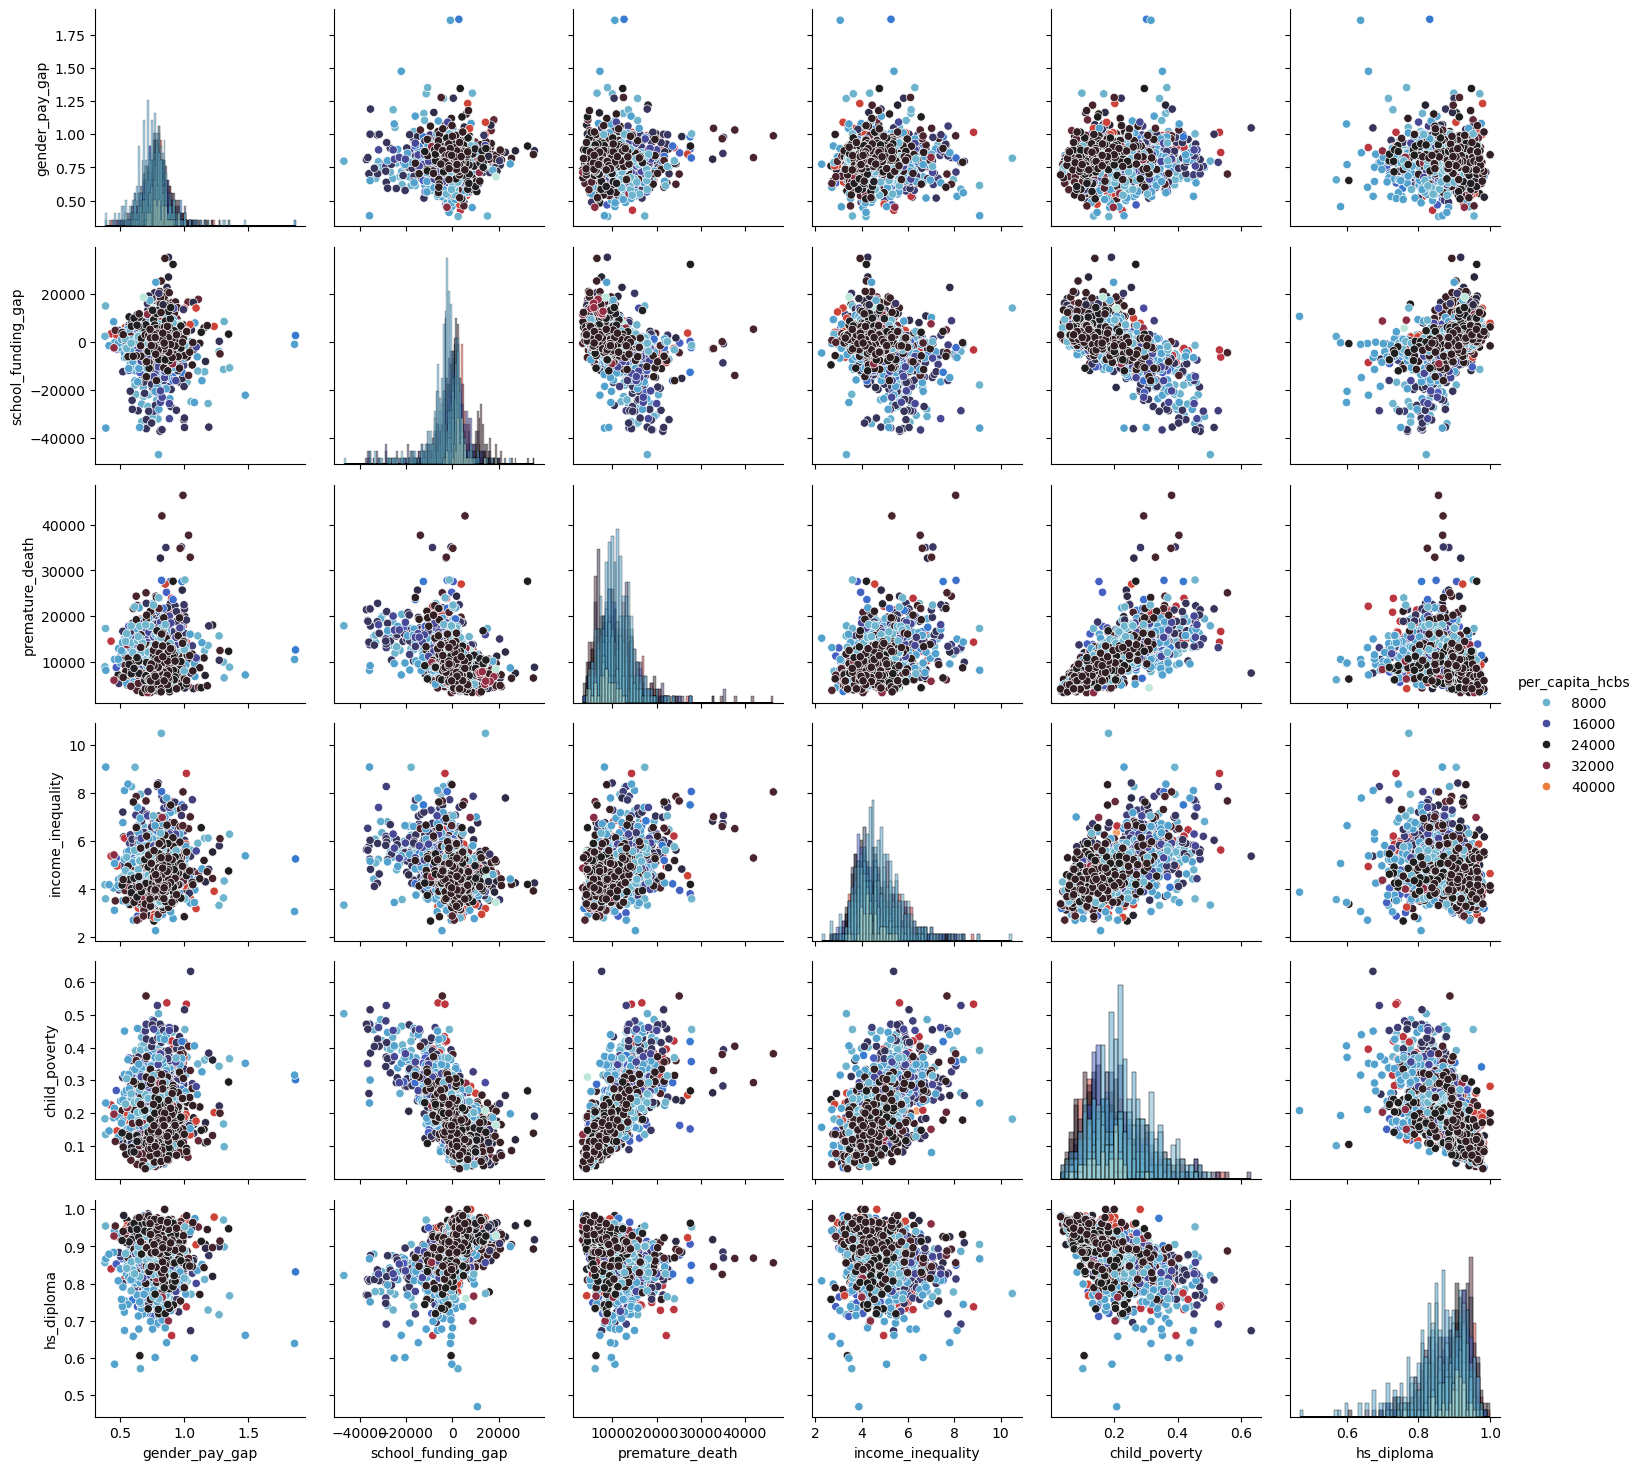

In [113]:
g = sns.PairGrid(subset_2, hue='per_capita_hcbs', palette='icefire', height=2.5)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()